In [2]:
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from scipy.linalg import svd
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import center_of_mass

In [9]:
(images, _), (_, _) = mnist.load_data()
images = images.reshape(images.shape[0], -1)[:10000, :]
print(flattened.shape)

# SVD
svd_original = TruncatedSVD(n_components=(28*28) - 1)
svd_original.fit_transform(flattened)


(10000, 784)


array([[1654.59197638,  -75.27535138, -316.6578515 , ...,    0.        ,
           0.        ,    0.        ],
       [1774.04305489,  916.81279352, -438.59605186, ...,    0.        ,
           0.        ,    0.        ],
       [ 805.83193093,  367.62847676,  333.40170172, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [1801.81392037, -855.86376177, -231.69511043, ...,    0.        ,
           0.        ,    0.        ],
       [1324.87943471, -348.81340655,  498.33990721, ...,    0.        ,
           0.        ,    0.        ],
       [1339.00343325, -363.77575311,  637.32062934, ...,    0.        ,
           0.        ,    0.        ]])

In [12]:
# polynomial kernel

gamma=1/flattened.shape[0]
print(gamma)
kernel_matrix_gamma_1 = polynomial_kernel(flattened) 
print("-------------------")

gamma = gamma * 10
print(gamma)
kernel_matrix_gamma_2 = polynomial_kernel(flattened, gamma=gamma) 
print("-------------------")

gamma = gamma * 100
print(gamma)
kernel_matrix_gamma_3 = polynomial_kernel(flattened, gamma=gamma) 
print("-------------------")

coeff = 1
kernel_matrix_coef01 = polynomial_kernel(flattened, coef0=coeff) 

coeff = 10
kernel_matrix_coef02 = polynomial_kernel(flattened, coef0=coeff) 

coeff = 100
kernel_matrix_coef03 = polynomial_kernel(flattened, coef0=coeff) 

deg = 3
kernel_matrix_deg1 = polynomial_kernel(flattened, degree=deg) 

deg = 4
kernel_matrix_deg2 = polynomial_kernel(flattened, degree=deg) 

deg = 5
kernel_matrix_deg3 = polynomial_kernel(flattened, degree=deg) 

0.0001
-------------------
0.001
-------------------
0.1
-------------------


In [4]:
# SVD
poly_kernel_svd = TruncatedSVD(n_components=(28*28) - 1)
poly_kernel_svd.fit_transform(kernel_matrix)

array([[ 4.13710503e+18, -5.17729484e+17,  3.82491454e+17, ...,
        -8.25046373e+15, -7.36645326e+15,  7.31341142e+14],
       [ 7.31525233e+18,  3.82094263e+18, -8.72930829e+17, ...,
        -3.59425819e+15,  4.68879927e+14,  1.58710562e+15],
       [ 5.59995417e+17, -9.98250563e+16, -5.22826172e+16, ...,
        -3.60705793e+15, -3.97945600e+15,  1.97314437e+14],
       ...,
       [ 1.13360964e+18, -5.96926374e+17,  1.07886933e+17, ...,
         4.96478856e+14, -1.88882743e+15, -1.73132320e+15],
       [ 2.25200192e+18, -8.87963840e+17, -4.09013464e+17, ...,
         1.80520286e+14,  2.81471480e+15, -1.78259404e+14],
       [ 3.78937917e+18, -1.49515769e+18,  8.42660706e+17, ...,
         1.17612499e+15,  1.05336530e+16, -2.69024405e+15]])

In [5]:

poly_kernel_svd_2 = TruncatedSVD(n_components=(28*28) - 1)
poly_kernel_svd_2.fit_transform(kernel_matrix_2)

array([[ 5.17134699e+20, -6.47159942e+19,  4.78110930e+19, ...,
         4.27978980e+17, -1.73570934e+17, -3.04370626e+17],
       [ 9.14402242e+20,  4.77615934e+20, -1.09115972e+20, ...,
         2.76496797e+17, -6.19266055e+17, -4.31303362e+17],
       [ 6.99985540e+19, -1.24780255e+19, -6.53524802e+18, ...,
        -1.07257628e+17, -7.20304795e+16, -2.79441350e+16],
       ...,
       [ 1.41699724e+20, -7.46152178e+19,  1.34857492e+19, ...,
        -9.52840109e+14, -7.66719654e+16, -3.97122881e+17],
       [ 2.81497889e+20, -1.10994800e+20, -5.11263786e+19, ...,
         3.13423241e+17,  8.40152120e+16,  2.13608493e+17],
       [ 4.73669085e+20, -1.86893915e+20,  1.05331973e+20, ...,
        -1.79785068e+17,  4.72785089e+17,  3.36302949e+17]])

In [6]:
poly_kernel_svd_3 = TruncatedSVD(n_components=(28*28) - 1)
poly_kernel_svd_3.fit_transform(kernel_matrix_3)

array([[ 5.17142417e+17, -6.47164245e+16,  4.78118552e+16, ...,
        -3.21357528e+14, -3.31843583e+14,  7.60232516e+14],
       [ 9.14411915e+17,  4.77620196e+17, -1.09116830e+17, ...,
         7.41708070e+13,  2.99812518e+14, -2.47580470e+14],
       [ 7.00005185e+16, -1.24782653e+16, -6.53542607e+15, ...,
        -2.45660414e+14,  1.50590224e+14,  2.05706656e+14],
       ...,
       [ 1.41703057e+17, -7.46165204e+16,  1.34860135e+16, ...,
        -9.72401670e+13, -1.63446397e+14,  2.13669715e+14],
       [ 2.81503178e+17, -1.10996330e+17, -5.11270636e+16, ...,
        -3.62201997e+14,  2.38403606e+14, -1.02773982e+14],
       [ 4.73676536e+17, -1.86895706e+17,  1.05333357e+17, ...,
         6.81548686e+14, -3.77663278e+14,  4.83079453e+14]])

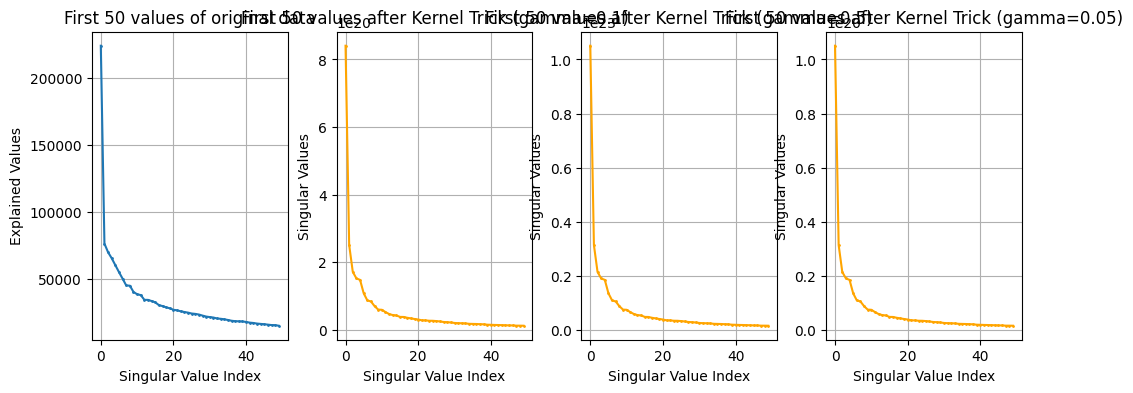

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(141)
plt.plot(svd_original.singular_values_, marker='o', markersize=1)
plt.title("First 50 values of original data")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Values")
plt.grid(True)

plt.subplot(142)
plt.plot(poly_kernel_svd.singular_values_, marker='o', color='orange', markersize=1)
plt.title("First 50 values after Kernel Trick (gamma=0.1)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplot(143)
plt.plot(poly_kernel_svd_2.singular_values_, marker='o', color='orange', markersize=1)
plt.title("First 50 values after Kernel Trick (gamma=0.5)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplot(144)
plt.plot(poly_kernel_svd_3.singular_values_, marker='o', color='orange', markersize=1)
plt.title("First 50 values after Kernel Trick (gamma=0.05)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplots_adjust(wspace=0.25)
plt.show()

In [8]:
# Rbf kernel radial basis function
gamma = 0.1  
rbf_matrix_1 = rbf_kernel(flattened, gamma=gamma) 

In [9]:
gamma = 0.5
rbf_matrix_2 = rbf_kernel(flattened, gamma=gamma) 

In [10]:
gamma = 0.05 
rbf_matrix_3 = rbf_kernel(flattened, gamma=gamma) 

In [11]:
# SVD
rbf_kernel_svd = TruncatedSVD(n_components=(28*28) - 1)
rbf_kernel_svd.fit_transform(rbf_matrix_1)

array([[-0.00212583,  0.00436498, -0.00899901, ...,  0.00323105,
        -0.00211867, -0.00394435],
       [-0.0015324 , -0.00577774, -0.00991464, ..., -0.00028285,
         0.0100146 ,  0.00992305],
       [ 0.00019524, -0.00146147, -0.00929225, ...,  0.00469878,
        -0.00685504, -0.00129616],
       ...,
       [ 0.00290903, -0.00158448,  0.00260807, ...,  0.0055711 ,
         0.0079378 , -0.00480381],
       [-0.00740824, -0.00579207, -0.01481485, ...,  0.0067097 ,
         0.01035376,  0.00885293],
       [ 0.0081259 , -0.01506539,  0.00431851, ...,  0.00167192,
        -0.00514653,  0.01270608]])

In [12]:
rbf_kernel_svd_2 = TruncatedSVD(n_components=(28*28) - 1)
rbf_kernel_svd_2.fit_transform(rbf_matrix_2)

array([[-1.39951888e-03,  1.10655999e-03, -2.02325712e-03, ...,
         3.29730873e-04, -5.65559335e-04,  2.29760518e-03],
       [-6.23462185e-04,  2.42165663e-03,  5.77405260e-03, ...,
         1.34006178e-05, -3.02137919e-03,  3.54876274e-03],
       [-1.20349466e-02,  6.69804822e-03,  2.19702964e-03, ...,
         4.84823257e-03, -1.27197910e-02, -1.45024893e-02],
       ...,
       [-1.35941133e-03,  4.09356480e-03,  3.60176325e-03, ...,
         3.90304701e-03,  8.96619279e-04, -1.79404867e-03],
       [-8.57064896e-03, -2.07644964e-03, -3.20625604e-03, ...,
        -3.13780567e-03,  3.81206205e-03,  3.71972954e-03],
       [-5.42132569e-03,  1.27370029e-03, -7.40079294e-05, ...,
         3.76835214e-03,  7.11923190e-03,  3.51831522e-03]])

In [13]:
rbf_kernel_svd_3 = TruncatedSVD(n_components=(28*28) - 1)
rbf_kernel_svd_3.fit_transform(rbf_matrix_3)

array([[ 1.05905781e-03, -6.09626712e-04,  4.76218032e-03, ...,
         2.90613048e-03, -6.26532073e-04,  3.34257304e-03],
       [-2.65930250e-03, -2.57629546e-03, -4.03068598e-03, ...,
        -1.09184164e-03,  5.29727684e-03, -1.38094336e-02],
       [-3.63695121e-03,  5.91200994e-05,  1.35781320e-02, ...,
        -1.34245785e-02,  6.95145513e-03, -1.65765443e-03],
       ...,
       [ 1.26338804e-02,  1.06386180e-02,  6.87791036e-03, ...,
        -1.05737493e-03,  1.27193887e-02, -4.20501781e-03],
       [ 4.71236635e-03,  4.82867098e-04,  7.97425300e-03, ...,
        -1.08788491e-03, -1.40680552e-03,  2.14337362e-03],
       [ 1.11575531e-02, -1.21370582e-02, -2.36789517e-03, ...,
        -1.47511516e-03,  1.12366225e-02, -7.38366882e-03]])

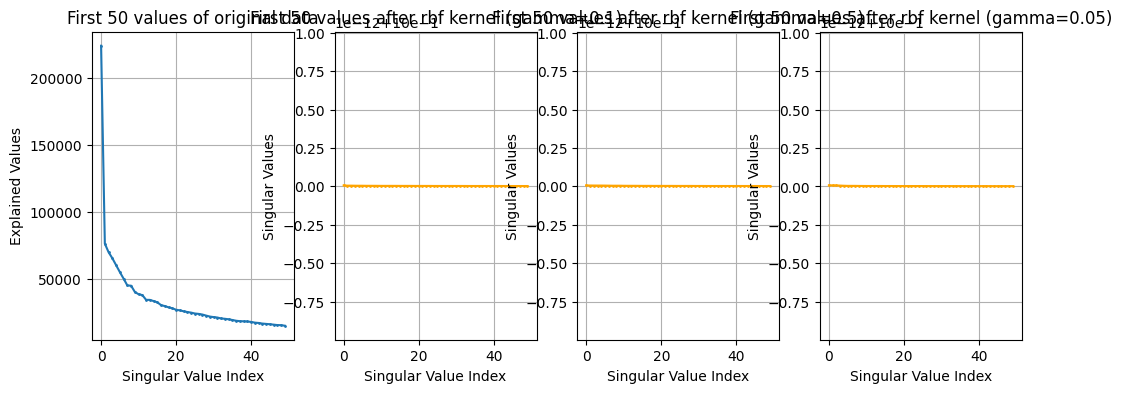

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(141)
plt.plot(svd_original.singular_values_[:50], marker='o', markersize=1)
plt.title("First 50 values of original data")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Values")
plt.grid(True)

plt.subplot(142)
plt.plot(rbf_kernel_svd.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after rbf kernel (gamma=0.1)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplot(143)
plt.plot(rbf_kernel_svd_2.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after rbf kernel (gamma=0.5)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplot(144)
plt.plot(rbf_kernel_svd_3.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after rbf kernel (gamma=0.05)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.show()